In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import norm

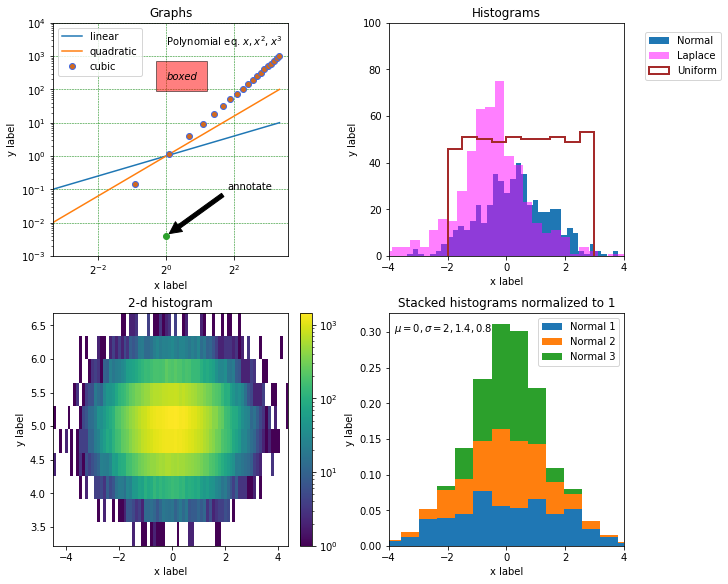

In [2]:
#  use pyplot to automatically create and manage the Figures and Axes,

plt.figure(figsize=(10, 8), layout='constrained')

# 1st plot at (0,0) --------------------------------------------------------------------------------
plt.subplot(2, 2, 1) # nrows=2, ncols=2, current plot is 1st. It is same as plt.subplot(221)
x = np.linspace(0, 10, 100)                              # Sample data.
x1 = np.linspace(0, 10, 20)
plt.plot(x, x, label='linear')                           # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')                     # etc.
plt.plot(x1, x1**3, label='cubic', color='None', marker='o', markerfacecolor='chocolate', markeredgecolor='royalblue')
plt.xlabel('x label'); plt.ylabel('y label');            # axis lable
plt.title("Graphs");                                     # plot label
plt.xscale('log', base=2); plt.yscale('log', base=10)    # axis scale to linear, log, symlog: symmetric log, logit
plt.xlim(0.1, 12); plt.ylim(1e-3,1e4)                    # axis range
plt.legend();

# grid
#plt.grid()  # plot grid along both x and y axes
#plt.grid(axis = 'x') # grid along x-axis only
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# text and annotation
plt.text(1, 2e3, r'Polynomial eq. $x, x^{2}, x^{3}$')
plt.text(1, 2e2, 'boxed', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.plot([1], [4e-3], 'o')
plt.annotate('annotate', xy=(1, 4e-3), xytext=(3.5, 1e-1),
            arrowprops=dict(facecolor='black', shrink=0.05))

# 2nd plot at (0,1) --------------------------------------------------------------------------------
plt.subplot(2, 2, 2) # nrows=2, ncols=2, current plot is 2st. It is same as plt.subplot(222)
bins1 = 40
n, bins, patches = plt.hist(np.random.normal(loc=0.3, scale=1.2, size=500),    label='Normal',  bins=bins1)
n, bins, patches = plt.hist(np.random.laplace(loc=-0.5, scale=0.9, size=500) , label='Laplace', bins=bins1, color='magenta', alpha = 0.5, linewidth=2)
n, bins, patches = plt.hist(np.random.uniform(low=-2, high=3.0, size=500),     label='Uniform', histtype='step', color='brown', linewidth=2)
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Histograms")
plt.axis([-4, 4, 0, 100])                                    # matplotlib.pyplot.axis([xmin, xmax, ymin, ymax])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.9);

# 3rd plot at (1,0) --------------------------------------------------------------------------------
plt.subplot(223)
N_points = 100000
n_bins = 20
dist1 = np.random.standard_normal(N_points)                   # Generate two normal distributions
dist2 = 0.4 * np.random.standard_normal(N_points) + 5
counts, xedges, yedges, im = plt.hist2d(dist1, dist2, bins=(80, 10), norm=colors.LogNorm())
plt.colorbar(im)                                              # color scale on right side
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("2-d histogram")

# 4th plot at (1,1) --------------------------------------------------------------------------------
plt.subplot(2, 2, 4) # nrows=2, ncols=2, current plot is 3rd. It is same as plt.subplot(223)
bins1 = 20
x_1 = np.random.normal(loc=0, scale=2, size=500)
x_2 = np.random.normal(loc=0, scale=1.4, size=500)
x_3 = np.random.normal(loc=0, scale=0.8, size=500)
n, bins, patches = plt.hist([x_1, x_2, x_3], bins=bins1, histtype='bar', stacked=True, density=True, label=['Normal 1', 'Normal 2', 'Normal 3'])
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Stacked histograms normalized to 1")
plt.xlim(-4, 4);
plt.legend();
plt.text(-3.8, 0.3, r'$\mu=0, \sigma=2, 1.4, 0.8$')

#plt.show()
plt.savefig('SimplePlots_2_plot1.png', transparent=False, dpi=80, bbox_inches="tight")

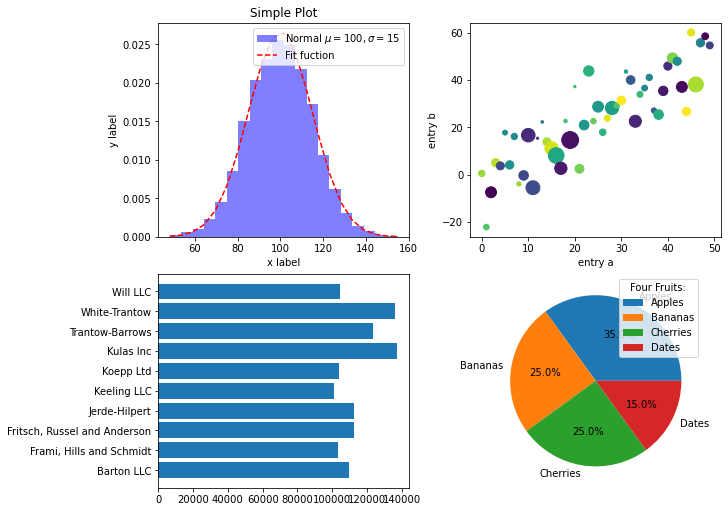

In [3]:
# Object-oriented (OO) style
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), layout='constrained')

# 1st subplot 0,0 --------------------------------------------------------
mu = 100                   # mean of distribution
sigma = 15                 # standard deviation of distribution
x1 = mu + sigma * np.random.randn(10000)
nBins1=20
n, bins, patches = axs[0, 0].hist(x1, bins=nBins1, label='Normal $\mu=%d, \sigma=%d$' % (mu, sigma), density=True, facecolor='blue', alpha=0.5 ) # axs[0][0] = axs[0, 0] 
# bins: x-vlaues, n: y-values
#print("n {}, \nbins {}, \npatches {}".format(n, bins, patches))

# add best fit line
func1 = norm.pdf(bins, mu, sigma)
axs[0, 0].plot(bins, func1, 'r--', label='Fit fuction') # 'r--': red color line with -- style

axs[0, 0].set_xlabel('x label');  axs[0, 0].set_ylabel('y label');  # axis label  
axs[0, 0].set_title("Simple Plot")                                  # plot label
axs[0, 0].legend();                                                 # Add a legend.


# 2nd subplot 0,1 --------------------------------------------------------
data1 = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data1['b'] = data1['a'] + 10 * np.random.randn(50)
data1['d'] = np.abs(data1['d']) * 100

axs[0, 1].scatter('a', 'b', c='c', s='d', data=data1) # scatter(x,y, c=color, s=size)
# same as axs[1, 0].scatter(data1['a'], data1['b'], c=data1['c'], s=data1['d']) 
axs[0, 1].set_xlabel('entry a')
axs[0, 1].set_ylabel('entry b');
#print("data1['a'] {}, \ndata1['b'] {}, \ndata1['c'] {}, \ndata1['d'] {}".format(data1['a'], data1['b'], data1['c'], data1['d']))

# 3rd subplot 1,0 --------------------------------------------------------
data2 = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}

axs[1, 0].barh(list(data2.keys()), list(data2.values()))

# 4th subplot 1,1 --------------------------------------------------------
y1 = np.array([35, 25, 25, 15])
mylabels1 = ["Apples", "Bananas", "Cherries", "Dates"]

axs[1, 1].pie(y1, labels = mylabels1, autopct='%1.1f%%')
axs[1, 1].legend(title = "Four Fruits:")

fig.savefig('SimplePlots_2_plot2.png', transparent=False, dpi=80, bbox_inches="tight")